In [0]:
from google.colab import drive


In [2]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
ls

drive/  sample_data/


# New Section

In [0]:
from IPython.display import Image
import numpy as np
import pandas as pd
import os
import ntpath
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import keras
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Convolution2D,MaxPooling2D,Dropout,Flatten,Dense
import cv2
from sklearn.model_selection import train_test_split
import random
from random import shuffle
import sys

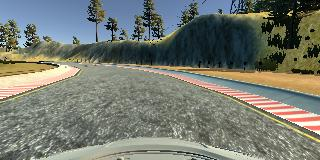

In [7]:
Image('drive/My Drive/data/IMG/center_2019_03_09_09_37_57_684.jpg',width=720)

In [8]:
pd.read_csv("drive/My Drive/data/driving_log.csv") 

,C:\Users\ashum\OneDrive\Desktop\data\IMG\center_2019_03_09_09_37_57_684.jpg,C:\Users\ashum\OneDrive\Desktop\data\IMG\left_2019_03_09_09_37_57_684.jpg,C:\Users\ashum\OneDrive\Desktop\data\IMG\right_2019_03_09_09_37_57_684.jpg,0,0.1,0.2,1.480007E-05
0,C:\Users\ashum\OneDrive\Desktop\data\IMG\cente...,C:\Users\ashum\OneDrive\Desktop\data\IMG\left_...,C:\Users\ashum\OneDrive\Desktop\data\IMG\right...,0.00,0.000000,0.0,0.000005
1,C:\Users\ashum\OneDrive\Desktop\data\IMG\cente...,C:\Users\ashum\OneDrive\Desktop\data\IMG\left_...,C:\Users\ashum\OneDrive\Desktop\data\IMG\right...,0.00,0.000000,0.0,0.000019
2,C:\Users\ashum\OneDrive\Desktop\data\IMG\cente...,C:\Users\ashum\OneDrive\Desktop\data\IMG\left_...,C:\Users\ashum\OneDrive\Desktop\data\IMG\right...,0.00,0.000000,0.0,0.000011
3,C:\Users\ashum\OneDrive\Desktop\data\IMG\cente...,C:\Users\ashum\OneDrive\Desktop\data\IMG\left_...,C:\Users\ashum\OneDrive\Desktop\data\IMG\right...,0.00,0.000000,0.0,0.000001
4,C:\Users\ashum\OneDrive\Desktop\data\IMG\cente...,C:\Users\ashum\OneDrive\Desktop\data\IMG\left_...,C:\Users\ashum\OneDrive\Desktop\data\IMG\right...,0.00,0.000000,0.0,0.000019
5,C:\Users\ashum\OneDrive\Desktop\data\IMG\cente...,C:\Users\ashum\OneDrive\Desktop\data\IMG\left_...,C:\Users\ashum\OneDrive\Desktop\data\IMG\right...,0.00,0.000000,0.0,0.000009
6,C:\Users\ashum\OneDrive\Desktop\data\IMG\cente...,C:\Users\ashum\OneDrive\Desktop\data\IMG\left_...,C:\Users\ashum\OneDrive\Desktop\data\IMG\right...,0.00,0.000000,0.0,0.000016
7,C:\Users\ashum\OneDrive\Desktop\data\IMG\cente...,C:\Users\ashum\OneDrive\Desktop\data\IMG\left_...,C:\Users\ashum\OneDrive\Desktop\data\IMG\right...,0.00,0.000000,0.0,0.000015
8,C:\Users\ashum\OneDrive\Desktop\data\IMG\cente...,C:\Users\ashum\OneDrive\Desktop\data\IMG\left_...,C:\Users\ashum\OneDrive\Desktop\data\IMG\right...,0.00,0.000000,0.0,0.000002
9,C:\Users\ashum\OneDrive\Desktop\data\IMG\cente...,C:\Users\ashum\OneDrive\Desktop\data\IMG\left_...,C:\Users\ashum\OneDrive\Desktop\data\IMG\right...,0.00,0.260270,0.0,0.242009


In [9]:
columns=['center','left','right','steering','throttle','reverse','speed']
data=pd.read_csv("drive/My Drive/data/driving_log.csv",names = columns) 
data.head()

,center,left,right,steering,throttle,reverse,speed
0,C:\Users\ashum\OneDrive\Desktop\data\IMG\cente...,C:\Users\ashum\OneDrive\Desktop\data\IMG\left_...,C:\Users\ashum\OneDrive\Desktop\data\IMG\right...,0.0,0.0,0.0,0.000015
1,C:\Users\ashum\OneDrive\Desktop\data\IMG\cente...,C:\Users\ashum\OneDrive\Desktop\data\IMG\left_...,C:\Users\ashum\OneDrive\Desktop\data\IMG\right...,0.0,0.0,0.0,0.000005
2,C:\Users\ashum\OneDrive\Desktop\data\IMG\cente...,C:\Users\ashum\OneDrive\Desktop\data\IMG\left_...,C:\Users\ashum\OneDrive\Desktop\data\IMG\right...,0.0,0.0,0.0,0.000019
3,C:\Users\ashum\OneDrive\Desktop\data\IMG\cente...,C:\Users\ashum\OneDrive\Desktop\data\IMG\left_...,C:\Users\ashum\OneDrive\Desktop\data\IMG\right...,0.0,0.0,0.0,0.000011
4,C:\Users\ashum\OneDrive\Desktop\data\IMG\cente...,C:\Users\ashum\OneDrive\Desktop\data\IMG\left_...,C:\Users\ashum\OneDrive\Desktop\data\IMG\right...,0.0,0.0,0.0,0.000001


In [10]:
def  path_leaf(path):
  head,tail=ntpath.split(path)
  return tail
data['center']=data['center'].apply(path_leaf)
data['left']=data['left'].apply(path_leaf)
data['right']=data['right'].apply(path_leaf)
data.head()

,center,left,right,steering,throttle,reverse,speed
0,center_2019_03_09_09_37_57_684.jpg,left_2019_03_09_09_37_57_684.jpg,right_2019_03_09_09_37_57_684.jpg,0.0,0.0,0.0,0.000015
1,center_2019_03_09_09_37_57_764.jpg,left_2019_03_09_09_37_57_764.jpg,right_2019_03_09_09_37_57_764.jpg,0.0,0.0,0.0,0.000005
2,center_2019_03_09_09_37_57_849.jpg,left_2019_03_09_09_37_57_849.jpg,right_2019_03_09_09_37_57_849.jpg,0.0,0.0,0.0,0.000019
3,center_2019_03_09_09_37_57_943.jpg,left_2019_03_09_09_37_57_943.jpg,right_2019_03_09_09_37_57_943.jpg,0.0,0.0,0.0,0.000011
4,center_2019_03_09_09_37_58_020.jpg,left_2019_03_09_09_37_58_020.jpg,right_2019_03_09_09_37_58_020.jpg,0.0,0.0,0.0,0.000001


[-1.   -0.92 -0.84 -0.76 -0.68 -0.6  -0.52 -0.44 -0.36 -0.28 -0.2  -0.12
 -0.04  0.04  0.12  0.2   0.28  0.36  0.44  0.52  0.6   0.68  0.76  0.84
  0.92  1.  ]
[-1.   -0.92 -0.84 -0.76 -0.68 -0.6  -0.52 -0.44 -0.36 -0.28 -0.2  -0.12
 -0.04  0.04  0.12  0.2   0.28  0.36  0.44  0.52  0.6   0.68  0.76  0.84
  0.92  1.  ]


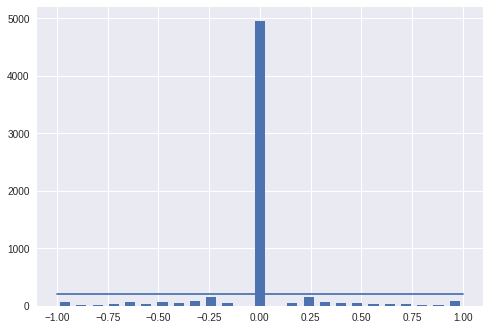

In [11]:
num_bins=25
samples_per_bin=200
hist,bins=np.histogram(data['steering'],num_bins)
print(bins)
center=(bins[:-1]+bins[1:])*0.5
print(bins)
plt.bar(center,hist,width=0.05)
plt.plot((np.min(data['steering']),np.max(data['steering'])),(samples_per_bin,samples_per_bin))

In [12]:
remove_list=[]
for i in range(num_bins):
  ilist=[]
  for j in range(len(data['steering'])):
    if(data['steering'][j]>=bins[i] and data['steering'][j]<=bins[i+1]):
      ilist.append(j)
  shuffle(ilist)
  ilist=ilist[samples_per_bin:]
  remove_list.extend(ilist)
print('removed: ',len(remove_list))
data.drop(data.index[remove_list],inplace=True)
print('remaining: ',len(data))


removed:  4751
remaining:  1403


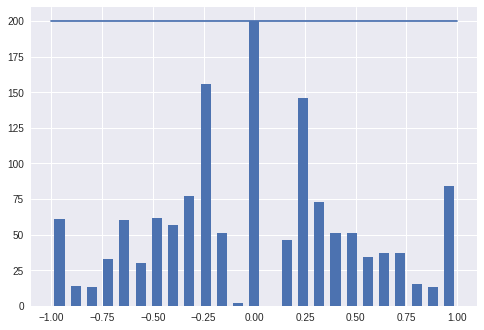

In [13]:
hist,_ = np.histogram(data['steering'],(num_bins))
plt.bar(center,hist,width=0.05)
plt.plot((np.min(data['steering']),np.max(data['steering'])),(samples_per_bin,samples_per_bin))

In [14]:
print(os.path)

<module 'posixpath' from '/usr/lib/python3.6/posixpath.py'>


In [15]:
datadir="drive/My Drive/data"
print(data.iloc[1])
def load_img_steering(datadir,df):
  image_path = []
  steering = []
  for i in range(len(data)):
    indexed_data = data.iloc[i]
    center,left,right = indexed_data[0],indexed_data[1],indexed_data[2]
    image_path.append(os.path.join(datadir, center.strip()))
    steering.append(float(indexed_data[3]))
  image_paths=np.asarray(image_path)
  steerings=np.asarray(steering)
  return image_paths,steering
image_paths,steering = load_img_steering(datadir + '/IMG', data)


center      center_2019_03_09_09_37_58_713.jpg
left          left_2019_03_09_09_37_58_713.jpg
right        right_2019_03_09_09_37_58_713.jpg
steering                                  -0.2
throttle                              0.914938
reverse                                      0
speed                                  2.09911
Name: 12, dtype: object


In [16]:
x_train,x_valid,y_train,y_valid=train_test_split(image_paths, steering, test_size=0.2, random_state=6)
print('Training Samples: {} \nValid Samples: {}'.format(len(x_train),len(x_valid)))

Training Samples: 1122 
Valid Samples: 281


Text(0.5, 1.0, 'Validation Set')

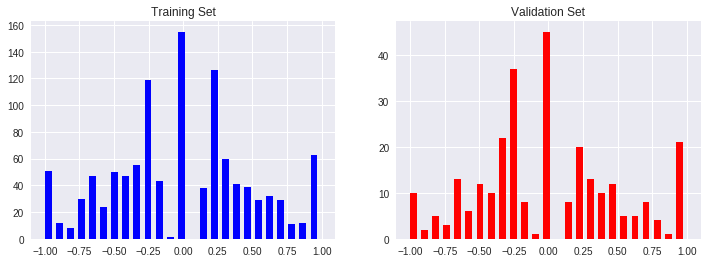

In [17]:
fig,axes = plt.subplots(1,2,figsize=(12,4))
axes[0].hist(y_train,bins=num_bins,width=0.05,color="blue")
axes[0].set_title("Training Set")
axes[1].hist(y_valid,bins=num_bins,width=0.05,color="red")
axes[1].set_title("Validation Set")

In [0]:
def img_preprocessing(img):
  img = mpimg.imread(img)
  img = img[60:135,:,:]
  img = cv2.cvtColor(img,cv2.COLOR_BGR2YUV)
  img = cv2.GaussianBlur(img, (3,3), 0)
  img = cv2.resize(img,(200,66))
  img = img/255
  return img

Text(0.5, 1.0, 'Preprocessed image')

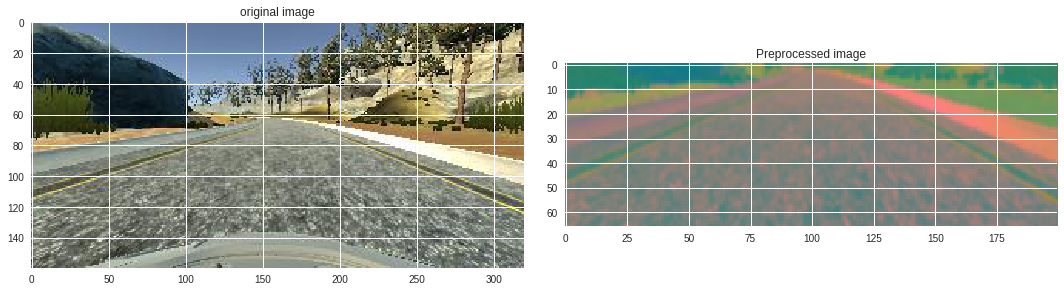

In [19]:
image = image_paths[100]
original_image=mpimg.imread(image)
preprocessed_image = img_preprocessing(image)

fig ,  axs = plt.subplots(1,2,figsize=(15,10))
fig.tight_layout()
axs[0].imshow(original_image)
axs[0].set_title('original image')
axs[1].imshow(preprocessed_image)
axs[1].set_title('Preprocessed image')

In [0]:
x_train = np.array(list(map(img_preprocessing, x_train)))
x_valid = np.array(list(map(img_preprocessing, x_valid)))

(1122, 66, 200, 3)


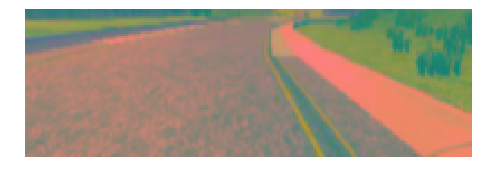

In [21]:
plt.imshow(x_train[random.randint(0,len(x_train)-1)])
plt.axis("off")
print(x_train.shape)

In [0]:
def nvidia_model():
  model = Sequential()
  model.add(Convolution2D(24,(5,5),subsample=(2,2),input_shape=(66,200,3),activation='elu'))
  model.add(Convolution2D(36,(5,5),subsample=(2,2),activation='elu'))
  model.add(Convolution2D(48,(5,5),subsample=(2,2),activation='elu'))
  model.add(Convolution2D(64,(3,3),activation='elu'))
  model.add(Convolution2D(64,(3,3),activation='elu'))
  model.add(Dropout(0.5))
  
  model.add(Flatten())
  model.add(Dense(100,activation = 'elu'))
  model.add(Dropout(0.5))
  
  model.add(Dense(50,activation = 'elu'))
  model.add(Dense(10,activation = 'elu'))
  model.add(Dense(1))
  
  optimizer = Adam(lr=1e-3)
  model.compile(loss='mse',optimizer=optimizer)
  return model

In [23]:
model = nvidia_model()
print(model.summary())

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(24, (5, 5), input_shape=(66, 200, ..., activation="elu", strides=(2, 2))`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(36, (5, 5), activation="elu", strides=(2, 2))`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (5, 5), activation="elu", strides=(2, 2))`
  """


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 31, 98, 24)        1824      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 47, 36)        21636     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 5, 22, 48)         43248     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 3, 20, 64)         27712     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 1, 18, 64)         36928     
_________________________________________________________________
dropout_1 (Dropout)          (None, 1, 18, 64)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1152)              0         
__________

In [24]:
history = model.fit(x_train, y_train, epochs=30, validation_data=(x_valid,y_valid), batch_size=100, verbose=1, shuffle=1)

Instructions for updating:
Use tf.cast instead.
Train on 1122 samples, validate on 281 samples
Epoch 1/30
1122/1122 [==============================] - 19s 17ms/step - loss: 1.5329 - val_loss: 0.2645
Epoch 2/30
1122/1122 [==============================] - 17s 16ms/step - loss: 0.3397 - val_loss: 0.2868
Epoch 3/30
1122/1122 [==============================] - 18s 16ms/step - loss: 0.2831 - val_loss: 0.2209
Epoch 4/30
1122/1122 [==============================] - 18s 16ms/step - loss: 0.2438 - val_loss: 0.2018
Epoch 5/30
1122/1122 [==============================] - 18s 16ms/step - loss: 0.2263 - val_loss: 0.1783
Epoch 6/30
1122/1122 [==============================] - 17s 16ms/step - loss: 0.2011 - val_loss: 0.1607
Epoch 7/30
1122/1122 [==============================] - 17s 15ms/step - loss: 0.1776 - val_loss: 0.1630
Epoch 8/30
1122/1122 [==============================] - 11s 10ms/step - loss: 0.1714 - val_loss: 0.1646
Epoch 9/30
1122/1122 [==============================] - 12s 10ms/step - l

Text(0.5, 0, 'Epoch')

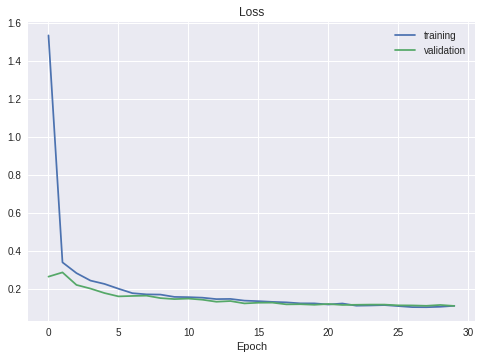

In [25]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('Loss')
plt.xlabel('Epoch')

In [0]:
model.save('model.h5')

In [0]:
from google.colab import files
files.download('model.h5')